In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /home/inflaton/code/sme-invoicing-assistant


In [31]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /home/inflaton/code/sme-invoicing-assistant/.env


True

In [32]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect(
    "results/llama3.2-vision_11b-functionary-small-RTX4090/emails.db"
)
# conn = sqlite3.connect("src/data/db/llama3.2-vision_11b-functionary-small-RTX4090/emails.db")

# Write your SQL query
query = "SELECT * FROM emails"

# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

df.head(5)

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
0,93185A89130149C0A842968E4AFDCAA2,RobinLevine@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43925,Hi Tanya ! Please find attached payment screen...,transaction_1.jpeg,SUCCESS,"Hi, I am currently involved in the reconciliat...",2025-01-22T07:09:26.387556,2025-01-22T07:09:28.470232,2.0827,2,681,539,142,0.0
1,614972488B7B411BAEA4814CF066CDAA,StevenNixon@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 51782,Hi Tanya ! Please find attached payment screen...,transaction_2.jpeg,SUCCESS,It seems there was an oversight on my end. Sin...,2025-01-22T07:09:28.478052,2025-01-22T07:09:32.467087,3.9890,8,2994,2432,562,0.0
2,C484ABEB38F44D29960B1CEF58510627,MadisonFord@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 42968,Hi Tanya ! Please find attached payment screen...,transaction_3.jpeg,SUCCESS,I apologize for the oversight in my previous m...,2025-01-22T07:09:32.471561,2025-01-22T07:09:40.436192,7.9646,20,7954,6543,1411,0.0
3,706B3403E8024178948B3BFBF9E64A25,KathrynJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 92948,Hi Tanya ! Please find attached payment screen...,transaction_4.jpeg,SUCCESS,My name is Tanya and I am the finance clerk fo...,2025-01-22T07:09:40.444316,2025-01-22T07:09:42.026707,1.5824,34,13543,11191,2352,0.0
4,86838440CA6C472AACFA3FCE1382609C,ChristineOwens@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 20304,Hi Tanya ! Please find attached payment screen...,transaction_5.jpeg,SUCCESS,It looks like there was an error with the proc...,2025-01-22T07:09:42.032006,2025-01-22T07:09:44.118443,2.0864,50,19816,16380,3436,0.0


In [33]:
import json

json_file = "results/llama3.2-vision_11b-functionary-small-RTX4090/full_logs.json"

if "full_logs" in df.columns:
    last_completed = df[df["full_logs"] != ""].iloc[-1]
    full_logs = json.loads(last_completed["full_logs"])
    json.dump(full_logs, open(json_file, "w"), indent=4)
    conn.execute("ALTER TABLE emails DROP COLUMN full_logs")
    conn.execute("VACUUM")
    conn.commit()
    print("full_logs saved to", json_file)
else:
    full_logs = json.load(open(json_file))
    print("full_logs loaded from", json_file)

# Close the connection
conn.close()

full_logs loaded from results/llama3.2-vision_11b-functionary-small-RTX4090/full_logs.json


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             2000 non-null   object
 1   sender_email         2000 non-null   object
 2   recipient_email      2000 non-null   object
 3   subject              2000 non-null   object
 4   email_body           2000 non-null   object
 5   attachments          2000 non-null   object
 6   process_status       2000 non-null   object
 7   response             2000 non-null   object
 8   start_time           2000 non-null   object
 9   end_time             2000 non-null   object
 10  total_time           2000 non-null   object
 11  successful_requests  2000 non-null   object
 12  total_tokens         2000 non-null   object
 13  prompt_tokens        2000 non-null   object
 14  completion_tokens    2000 non-null   object
 15  total_cost           2000 non-null   object
dtypes: obj

In [35]:
df.describe()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1988,1,1947,2000,1001,3,1990,2000,2000,1903,2000,2000,2000,2000,1
top,93185A89130149C0A842968E4AFDCAA2,MichaelJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Hi Tanya ! Please find attached payment screen...,,SUCCESS,"I'm sorry for the confusion, but I couldn't fi...",2025-01-22T07:09:26.387556,2025-01-22T07:09:28.470232,1.3667,2,681,539,142,0.0
freq,1,3,2000,3,1,1000,1762,8,1,1,3,1,1,1,1,2000


In [36]:
# plot the distribution of categories
import matplotlib.pyplot as plt


def plot_value_distribution(df2, col="category", top_n=10):
    df2[col].value_counts()[:top_n].plot(kind="bar")
    plt.title(f"Distribution of {col}")

    # add the count on top of the bars
    for i in range(len(df2[col].value_counts()[:top_n])):
        count = df2[col].value_counts().values[i]
        plt.text(i, count, count, ha="center")

    plt.show()

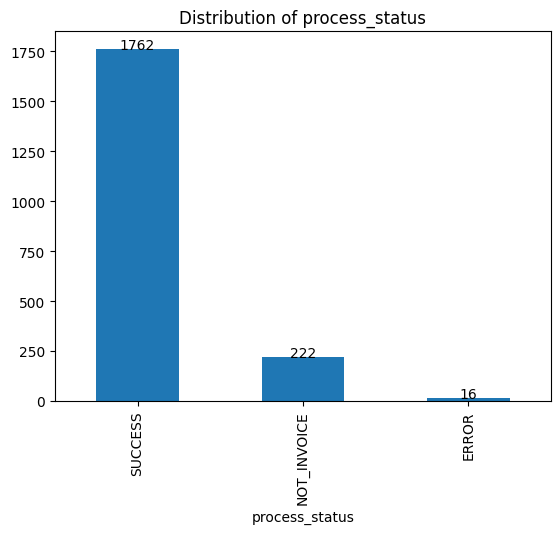

In [37]:
plot_value_distribution(df, "process_status")

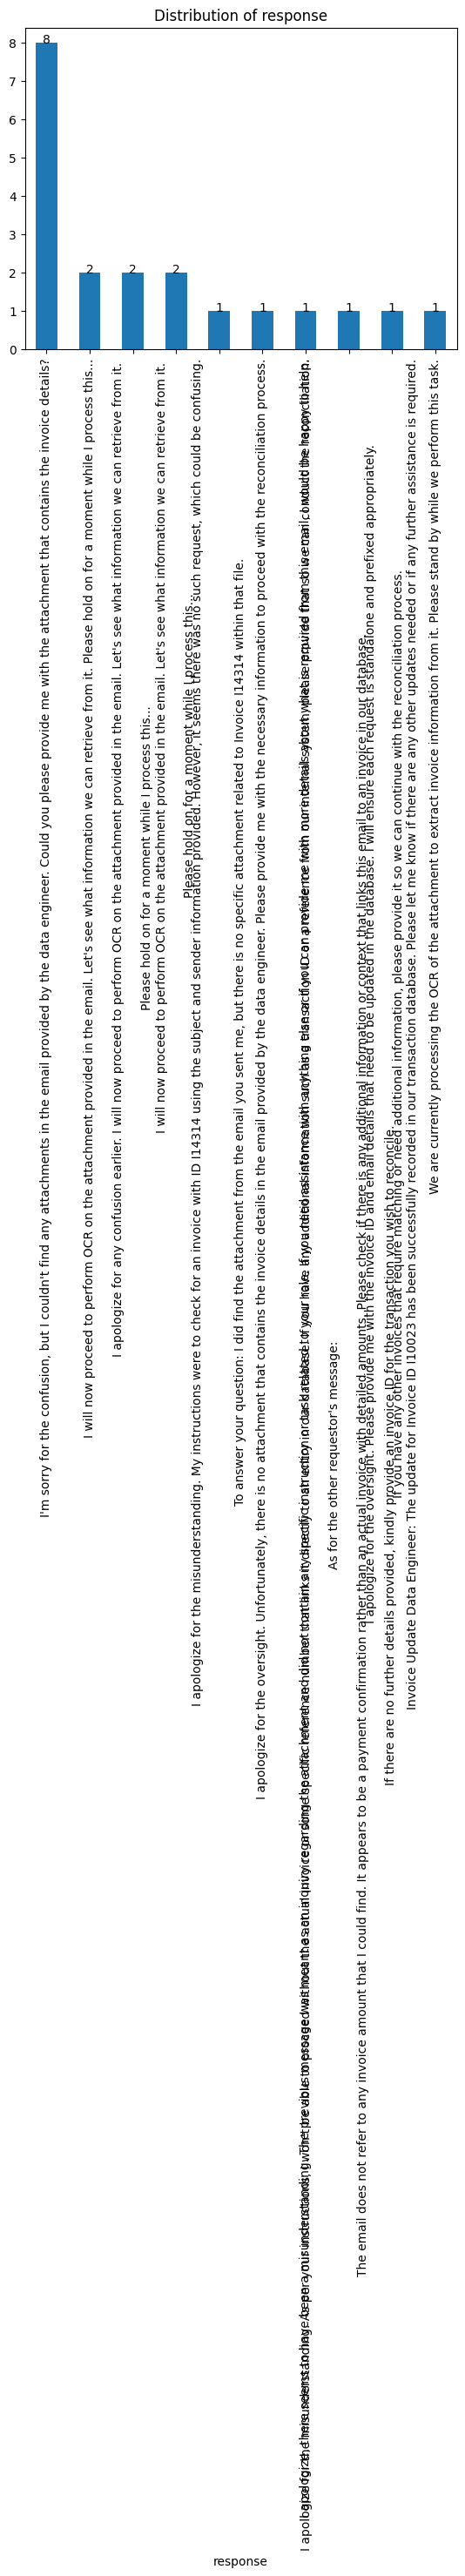

In [38]:
plot_value_distribution(df, "response")

In [39]:
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

In [40]:
df[["duration", "total_time"]].head()

,duration,total_time
0,2.082676,2.0827
1,3.989035,3.9890
2,7.964631,7.9646
3,1.582391,1.5824
4,2.086437,2.0864


<Axes: ylabel='Frequency'>

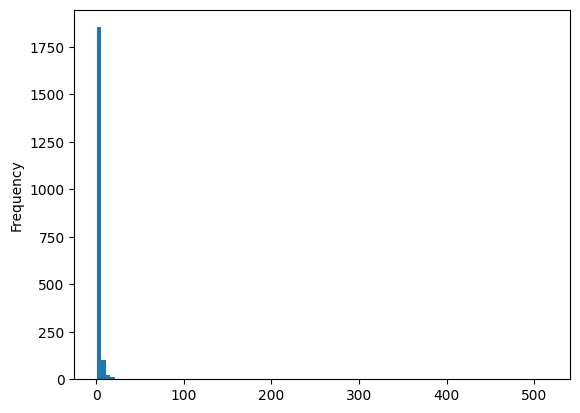

In [41]:
# plot the distribution of duration
df["duration"].plot(kind="hist", bins=100)

In [42]:
df[df["duration"] > 150]

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration
710,EC0D6C6CDDF14B948E481DCD28F9AD4A,CrystalGolden@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 79129,Hi Tanya ! Please find attached payment screen...,transaction_711.jpeg,SUCCESS,The tool has completed its task successfully.\...,2025-01-22 07:46:25.353357,2025-01-22 07:55:00.620537,515.2672,759810,294407211,239797271,54609940,0.0,515.267180
1919,fd92c93a-3c4c-4218-87ca-4132393604db,otorres@example.net,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Subject: Payment Confirmation for Invoice I132...,,SUCCESS,To begin reconciling the invoice using the pro...,2025-01-22 08:49:56.149773,2025-01-22 08:57:32.143019,455.9932,5140971,2177153036,1759417492,417735544,0.0,455.993246


In [43]:
df["duration"].describe()

count    2000.000000
mean        3.338937
std        15.584033
min         0.995340
25%         1.606194
50%         1.959204
75%         2.741847
max       515.267180
Name: duration, dtype: float64

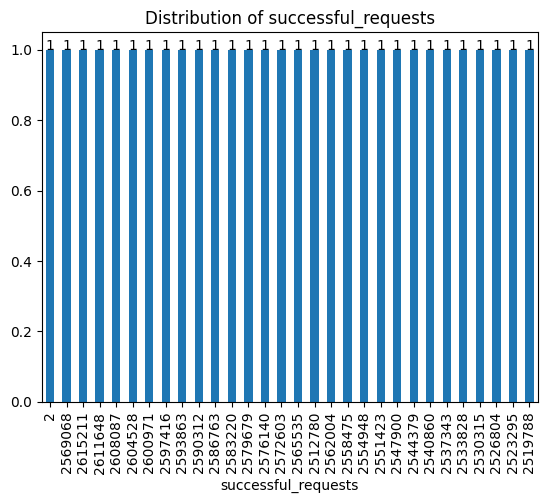

In [44]:
plot_value_distribution(df, "successful_requests", top_n=30)

In [45]:
df["process_status"].value_counts()

process_status
SUCCESS        1762
NOT_INVOICE     222
ERROR            16
Name: count, dtype: int64

In [46]:
success_rate = df["process_status"].value_counts()["SUCCESS"] / len(df)
success_rate

0.881

In [47]:
def total_power_in_watt(file_path):
    df = pd.read_csv(file_path)
    return df["CPU Package Power [W]"].mean() + df["GPU Power [W]"].mean()

In [48]:
power_idle = total_power_in_watt("results/power_idle.csv")
power_idle

29.873

In [49]:
power_with_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-functionary-small-RTX4090/power_with_vision.csv"
)
power_without_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-functionary-small-RTX4090/power_without_vision.csv"
)
power_with_vision, power_without_vision

(181.63819999999998, 200.52700000000002)

In [50]:
mean_response_time = df["duration"].mean()
mean_response_time

3.3389374065

In [51]:
average_energy_consumption = (
    (power_with_vision + power_without_vision) / 2 - power_idle
) * mean_response_time
average_energy_consumption

538.2687637269024

In [52]:
df.describe()

,start_time,end_time,duration
count,2000,2000,2000.000000
mean,2025-01-22 08:04:40.462317312,2025-01-22 08:04:43.801254656,3.338937
min,2025-01-22 07:09:26.387556,2025-01-22 07:09:28.470232,0.995340
25%,2025-01-22 07:35:54.919045632,2025-01-22 07:35:56.774904064,1.606194
50%,2025-01-22 08:09:01.726280448,2025-01-22 08:09:03.787724800,1.959204
75%,2025-01-22 08:30:05.744513280,2025-01-22 08:30:07.488065280,2.741847
max,2025-01-22 09:01:45.319838,2025-01-22 09:01:47.027681,515.267180
std,NaN,NaN,15.584033


In [53]:
row = df[df["process_status"] == "NOT_INVOICE"].iloc[0]
row

email_id                                63031695805B446F908A35E6F2022206
sender_email                                  LeslieAnderson@example.com
recipient_email                             tanya.official.456@gmail.com
subject                       Payment Confirmation for Invoice ID: 88941
email_body             Hi Tanya ! Please find attached payment screen...
attachments                                          transaction_15.jpeg
process_status                                               NOT_INVOICE
response               I have completed processing the attachment and...
start_time                                    2025-01-22 07:10:23.205670
end_time                                      2025-01-22 07:10:25.667102
total_time                                                        2.4614
successful_requests                                                  490
total_tokens                                                      188376
prompt_tokens                                      

In [54]:
full_logs[0]

{'name': 'input',
 'type': 'HumanMessage',
 'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: RobinLevine@example.com\n            Subject: Payment Confirmation for Invoice ID: 43925\n            Body: Hi Tanya ! Please find attached payment screenshot for Invoice ID: 43925 , Regards Robin Levine\n            Attachment: transaction_1.jpeg\n            Time stamp: NOT_STARTED\n            \n                ',
 'timestamp': '2025-01-22T09:01:45.319838',
 'usage': {'input_tokens': 0,
  'output_tokens': 0,
  'total_tokens': 0,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reasoning': 0}},
 'model_name': '',
 'additional_kwargs': {}}

In [55]:
for i, log in enumerate(full_logs):
    if row["attachments"] in log["content"]:
        print(i)
        break

54


In [56]:
full_logs[i : i + 5]

[{'name': 'input',
  'type': 'HumanMessage',
  'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: LeslieAnderson@example.com\n            Subject: Payment Confirmation for Invoice ID: 88941\n            Body: Hi Tanya ! Please find attached payment screenshot for Invoice ID: 88941 , Regards Leslie Anderson\n            Attachment: transaction_15.jpeg\n            Time stamp: NOT_STARTED\n            \n                ',
  'timestamp': '2025-01-22T09:01:45.319838',
  'usage': {'input_tokens': 0,
   'output_tokens': 0,
   'total_tokens': 0,
   'input_token_details': {'audio': 0, 'cache_read': 0},
   'output_token_details': {'audio': 0, 'reasoning': 0}},
  'model_name': '',
  'additional_kwargs': {}},
 {'name': 'finance_clerk',
  'type': 'AIMessage',
  'content': "I will now proceed to perform OCR on the attachment provided in the email. Let's see what information we can retrieve from it. \n\nPlease hold on for a mo